# Item Bank Calibration Analysis

## Imports & Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import ast

In [2]:
df = pd.read_csv('./Items Dataset/EST II Biology - March 2022 Working Copy.csv')

In [3]:
df.head()

,FIRSTNAME,SURNAME,USERNAME,STUDENT_TOTAL_SCORE,ASSESSMENT_MAX_SCORE,ASSESSMENT_STARTED,ASSESSMENT_ENDED,ITEM_1_SCORE,ITEM_1_MAX_SCORE,ITEM_2_SCORE,...,ITEM_76_SCORE,ITEM_76_MAX_SCORE,ITEM_77_SCORE,ITEM_77_MAX_SCORE,ITEM_78_SCORE,ITEM_78_MAX_SCORE,ITEM_79_SCORE,ITEM_79_MAX_SCORE,ITEM_80_SCORE,ITEM_80_MAX_SCORE
0,Begad,Yasser Abdelrehim Hassan,dupes@live.com,37,80,2022-03-26T08:02:38Z,2022-03-26T09:04:47Z,0.0,1,1.0,...,0.0,1,0.0,1,1.0,1,1.0,1,0.0,1
1,Sofian,Mohamed Fahmi Mohamed Mohamed Fayed,sofiianfayed@gmail.com,20,80,2022-03-26T08:04:04Z,2022-03-26T09:04:46Z,1.0,1,0.0,...,1.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,Youssef,Walid Ragab Mohamed Ragab,walidbhit@hotmail.com,34,80,2022-03-26T08:07:18Z,2022-03-26T09:08:40Z,1.0,1,1.0,...,1.0,1,0.0,1,0.0,1,0.0,1,1.0,1
3,Youssef,Sherif Youssef Owida Hassan,youssefowida04@gmail.com,33,80,2022-03-26T08:12:27Z,2022-03-26T09:13:28Z,0.0,1,1.0,...,1.0,1,0.0,1,1.0,1,0.0,1,1.0,1
4,Rouaa,Hamdi Abdalla Ali,hamdyroaa1@gmail.com,28,80,2022-03-26T08:01:58Z,2022-03-26T09:04:23Z,1.0,1,0.0,...,0.0,1,0.0,1,0.0,1,0.0,1,1.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Columns: 167 entries, FIRSTNAME to ITEM_80_MAX_SCORE
dtypes: float64(77), int64(85), object(5)
memory usage: 2.3+ MB


## EDA

    Filtering Item Top Score Columns

In [5]:
df = df[df.columns.drop(list(df.filter(regex=r'ITEM_[1-9][0-9]?_MAX_SCORE')))]

    Cleaning Time of taking test data

In [6]:
df['ASSESSMENT_STARTED'] = df["ASSESSMENT_STARTED"].str[11:]
df['ASSESSMENT_ENDED'] = df["ASSESSMENT_ENDED"].str[11:]
df["ASSESSMENT_STARTED"] = df["ASSESSMENT_STARTED"].str.replace("Z","")
df["ASSESSMENT_ENDED"] = df["ASSESSMENT_ENDED"].str.replace("Z","")

In [7]:
df.columns = map(str.lower, df.columns)
df = df.sort_values(by = 'student_total_score')

In [8]:
df.head()

,firstname,surname,username,student_total_score,assessment_max_score,assessment_started,assessment_ended,item_1_score,item_2_score,item_3_score,...,item_71_score,item_72_score,item_73_score,item_74_score,item_75_score,item_76_score,item_77_score,item_78_score,item_79_score,item_80_score
1082,Nanci,Ahmed Mohamed Sameh,nancisameh@gmail.com,7,80,08:01:15,08:46:00,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,Mohamed,Fady Abdou El Basyouni,manobeatbox44@gmail.com,7,80,08:03:29,08:35:08,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1499,Bavly,Awad Faragallah Rizkalla,bavlyawadfarag@gmail.com,8,80,08:01:16,08:33:44,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
363,Malek,Sobhe Abdul Diam,maleksobhe91@gmail.com,9,80,08:01:50,08:31:02,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
326,Hady,Wadie Samy,hadywadie2021@gmail.com,9,80,08:00:35,09:02:01,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
def assign_student_ability(student_total_score: int):
    
    if student_total_score <= 20:
        return 'Ability 1'
    
    elif 20 < student_total_score < 50:
        return 'Ability 2'

    elif 50 <= student_total_score < 70:
        return 'Ability 3'
    
    elif 70 <= student_total_score < 85:
        return 'Ability 4'

    elif 85 <= student_total_score < 95:
        return 'Ability 5'        

    else:
        return 'Ability 6'

df['student_ability'] = df['student_total_score'].apply(lambda student_total_score: assign_student_ability(student_total_score))


In [10]:
df.head()

,firstname,surname,username,student_total_score,assessment_max_score,assessment_started,assessment_ended,item_1_score,item_2_score,item_3_score,...,item_72_score,item_73_score,item_74_score,item_75_score,item_76_score,item_77_score,item_78_score,item_79_score,item_80_score,student_ability
1082,Nanci,Ahmed Mohamed Sameh,nancisameh@gmail.com,7,80,08:01:15,08:46:00,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ability 1
591,Mohamed,Fady Abdou El Basyouni,manobeatbox44@gmail.com,7,80,08:03:29,08:35:08,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Ability 1
1499,Bavly,Awad Faragallah Rizkalla,bavlyawadfarag@gmail.com,8,80,08:01:16,08:33:44,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Ability 1
363,Malek,Sobhe Abdul Diam,maleksobhe91@gmail.com,9,80,08:01:50,08:31:02,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ability 1
326,Hady,Wadie Samy,hadywadie2021@gmail.com,9,80,08:00:35,09:02:01,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Ability 1


0.43852908891328213


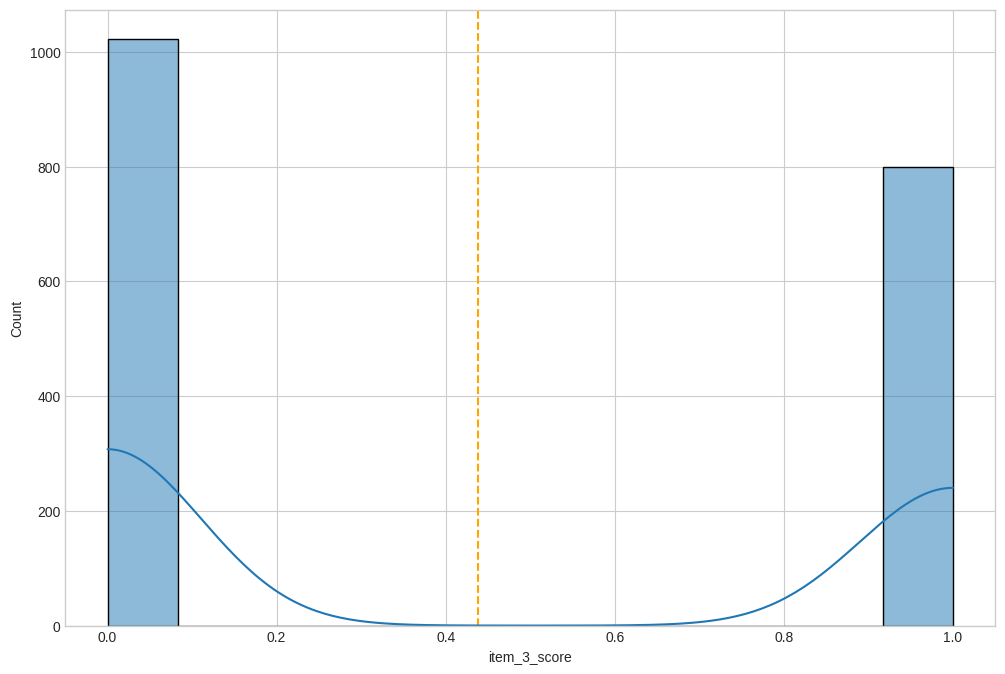

In [11]:
item_3_score = df['item_3_score'].describe()

plt.style.use('seaborn-whitegrid')

plt.subplots(figsize = (12, 8))

plt.axvline(x = item_3_score['mean'], linestyle='--', color='orange',label='Test results mean')

sns.histplot(x = df['item_3_score'] ,kde = True)

print(item_3_score['mean'])

In [12]:
# item_3_score = df['item_3_score'].describe()
# x = item_3_score['mean']
# print (x)

In [13]:
items_mean_list =[]
def check_items_mean(item):
    item_score = df[item].describe()
    x = item_score['mean']

    if x <0.2:
        items_mean_list.append(item)
        items_mean_list.append(x)
        # print (item ,x)
    else:
        return

for x in range(1, 80):
    item = 'item_{}_score'.format(x)
    check_items_mean(item)

print(items_mean_list)

['item_24_score', 0.11281489594742607, 'item_42_score', 0.1630971993410214, 'item_43_score', 0.17233809001097694, 'item_44_score', 0.18221734357848518, 'item_53_score', 0.16657534246575342, 'item_58_score', 0.16666666666666666, 'item_61_score', 0.13995609220636662, 'item_62_score', 0.18166849615806804, 'item_63_score', 0.18815139879319803, 'item_68_score', 0.11800219538968167, 'item_69_score', 0.12390350877192982, 'item_70_score', 0.19319429198682767, 'item_74_score', 0.16383561643835617, 'item_77_score', 0.17097306212204508]


/home/elearning/.local/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


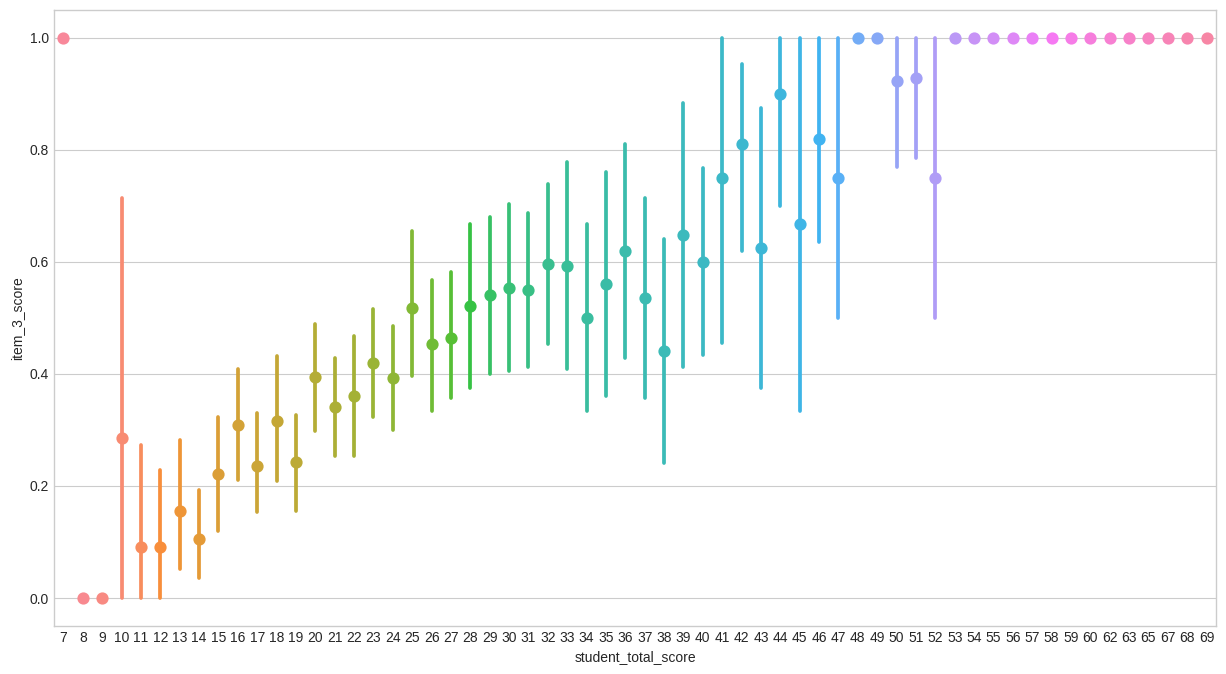

In [28]:
plt.figure(figsize=(15, 8))

sns.pointplot(data=df, x='student_total_score', y='item_3_score',hue='student_total_score')
plt.legend('', ncol=6, loc='upper left')

/home/elearning/.local/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot:xlabel='student_total_score', ylabel='item_3_score'>

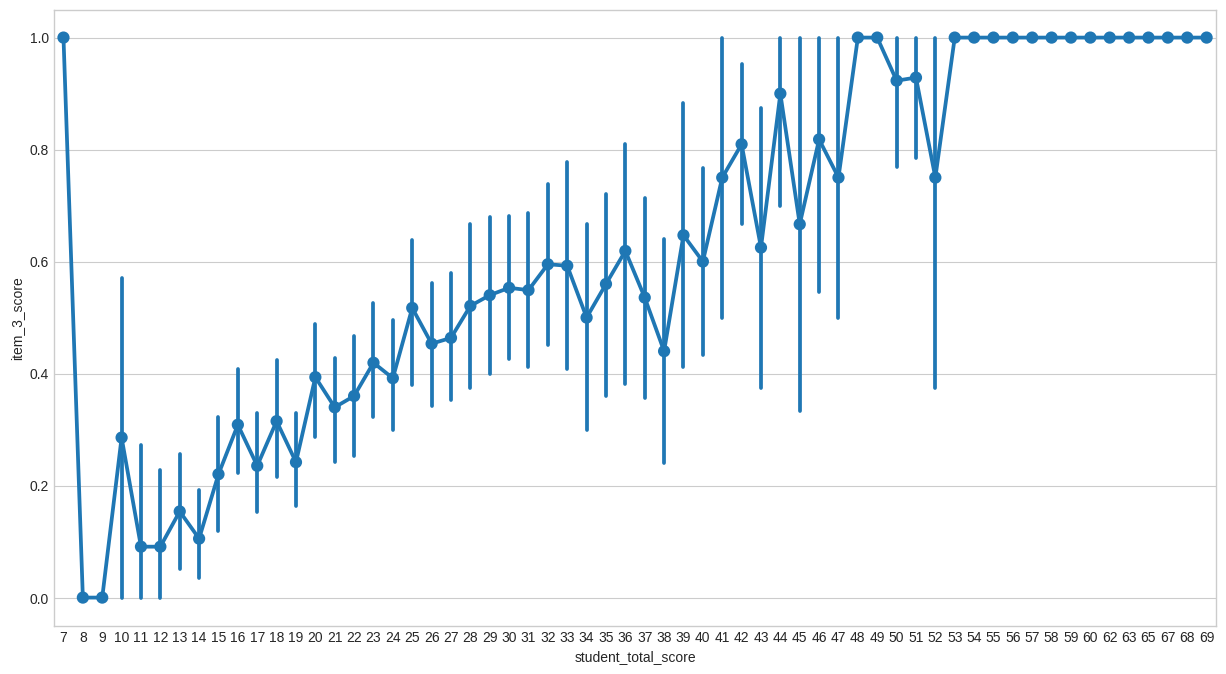

In [30]:
plt.figure(figsize=(15, 8))

sns.pointplot(data=df, x='student_total_score', y='item_3_score')